In [64]:
# 📦 UNIR CSVs PARA MODELO DE ATRIBUCIÓN
import pyodbc         # Conexión con bases de datos SQL Server
import pandas as pd   # Manipulación y transformación de datos
import numpy as np    # Gestión de datos numéricos
import os             # Operaciones con archivos y rutas
import warnings       # Control de advertencias
import seaborn as sns
import matplotlib.pyplot as plt
# Suprimir avisos innecesarios
warnings.filterwarnings("ignore", category=UserWarning)


In [65]:
# Cargar los archivos CSV
df_web = pd.read_csv("../data/WEB.csv")
df_visit = pd.read_csv("../data/VISIT.csv")
df_time = pd.read_csv("../data/TIME.csv")
df_offline = pd.read_csv("../data/OFFLINE.csv")
df_inv = pd.read_csv("../data/INV.csv")

# Limpiar columnas numéricas mal formateadas en INV
inv_clean = df_inv.copy()
for col in inv_clean.columns:
    if inv_clean[col].dtype == 'object' and col != 'ID_Date':
        inv_clean[col] = inv_clean[col].str.replace(',', '.', regex=False)
        inv_clean[col] = pd.to_numeric(inv_clean[col], errors='coerce')

# Unir los datasets por la columna común 'ID_Date'
df = df_web.merge(df_visit, on='ID_Date') \
        .merge(df_time, on='ID_Date') \
        .merge(df_offline, on='ID_Date') \
        .merge(inv_clean, on='ID_Date')

# Eliminar filas con valores nulos
df = df.dropna()

# Exportar el DataFrame unido a CSV (opcional)
df.to_csv("../data/Modelo_Atribucion_Unificado.csv", index=False, encoding='utf-8-sig')

In [66]:
df.head()

,ID_Date,Unique_visitors,PDFBrochuresDownloaded,ProductConfigurator,Product_configurator_Visists,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,...,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total
0,202201,272382,4838,33222,94248,1415,65373,25,167199,63649,...,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600.14
1,202202,352581,5823,38570,109531,546,77209,26,176733,124861,...,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515.08
2,202203,332955,4845,33956,97805,5444,83178,341,173514,104132,...,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522.47
3,202204,282169,3711,45949,90689,1184,69335,162,162805,74044,...,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941187.91
4,202205,261829,9037,48685,92069,8648,70972,210,156011,44196,...,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390.17


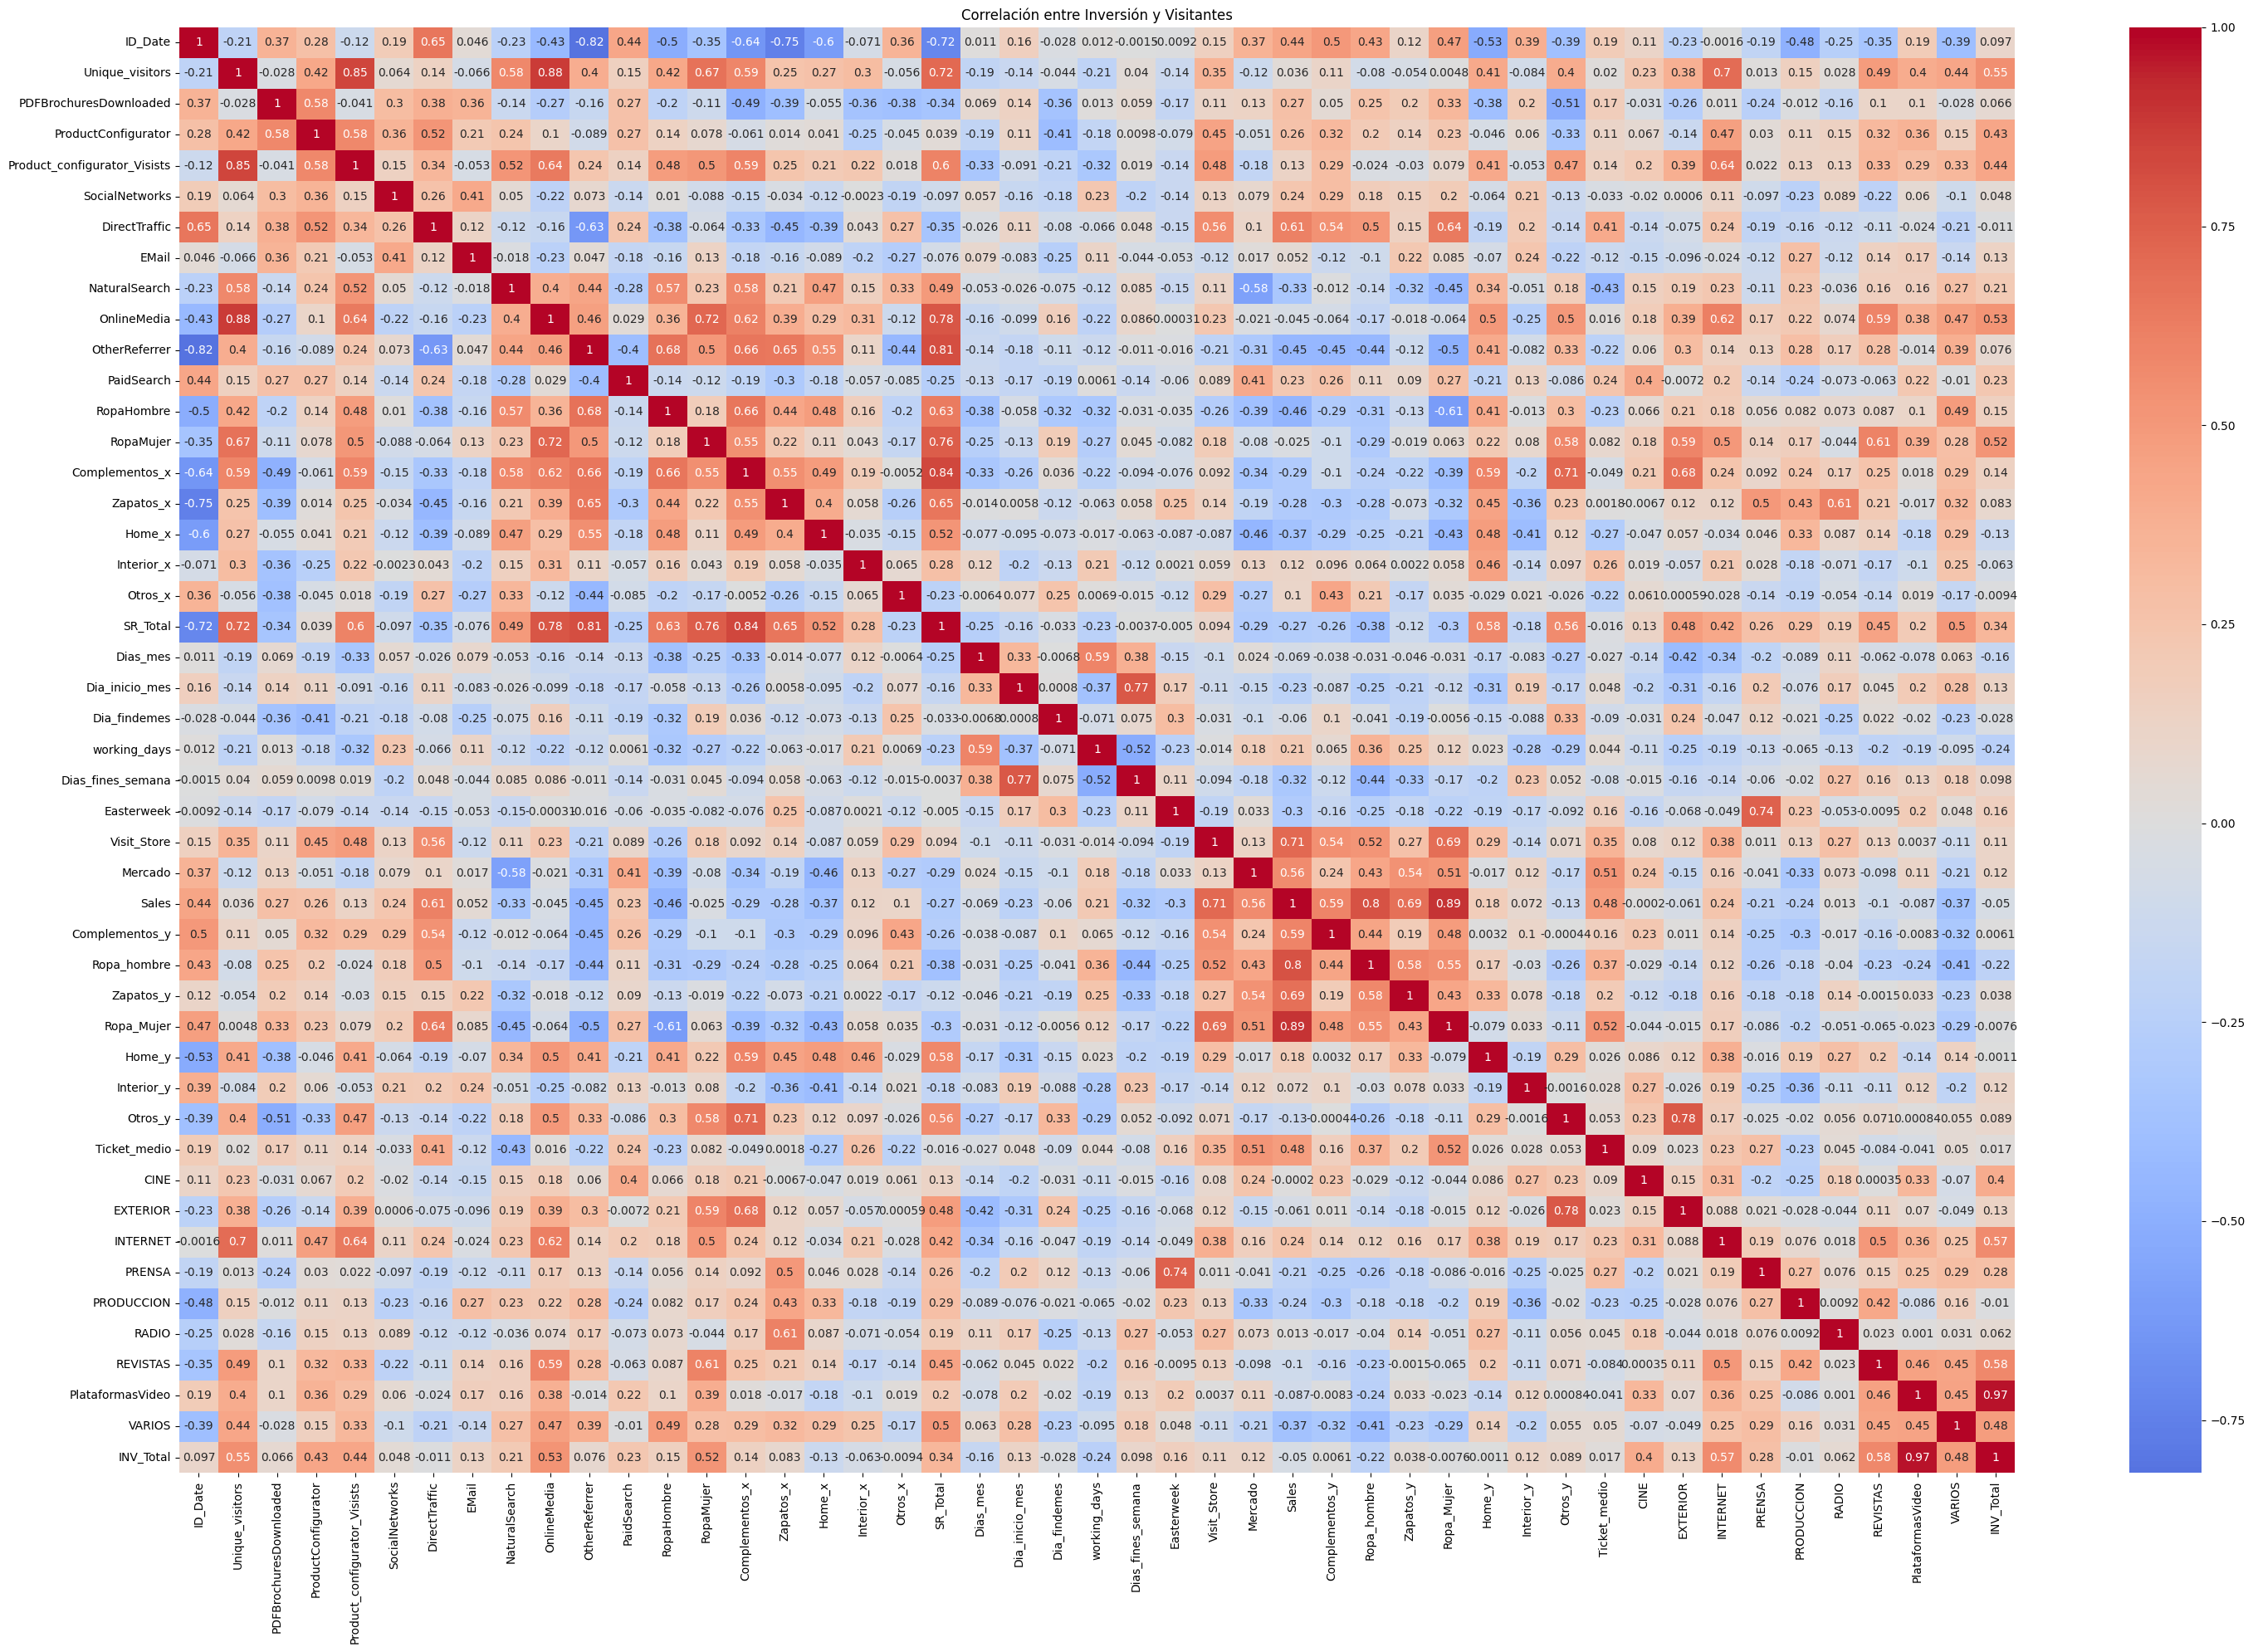

In [67]:
# Calcular matriz de correlación
corr = df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Inversión y Visitantes')
plt.tight_layout()
plt.show()

In [68]:
df.corr().to_csv("../data/Correlacion.csv", index=True, encoding='utf-8-sig')

In [69]:
# Cargar la matriz de correlación
df_corr = pd.read_csv("../data/Correlacion.csv", index_col=0)

# Extraer y mostrar solo la fila de 'Sales', ordenada de mayor a menor
sales_corr = df_corr.loc['Sales'].sort_values(ascending=False)

# Mostrar resultado
print(sales_corr)

Sales                           1.000000
Ropa_Mujer                      0.894943
Ropa_hombre                     0.799824
Visit_Store                     0.713005
Zapatos_y                       0.686925
DirectTraffic                   0.613117
Complementos_y                  0.590911
Mercado                         0.564543
Ticket_medio                    0.481195
ID_Date                         0.442720
PDFBrochuresDownloaded          0.274405
ProductConfigurator             0.259939
INTERNET                        0.243111
SocialNetworks                  0.239081
PaidSearch                      0.225588
working_days                    0.214987
Home_y                          0.182781
Product_configurator_Visists    0.126808
Interior_x                      0.117267
Otros_x                         0.100038
Interior_y                      0.071522
EMail                           0.051827
Unique_visitors                 0.035715
RADIO                           0.012550
CINE            

In [70]:
# Convertir ID_Date (tipo 202201) en una fecha real: 2022-01-01
df['Fecha'] = pd.to_datetime(df['ID_Date'].astype(str), format='%Y%m')

# Establecer Fecha como índice y ordenar
df.set_index('Fecha', inplace=True)
df.sort_index(inplace=True)

#Indicar que es una serie mensua
df_web = df.asfreq('MS')

# Para que no salga la hora
df_web.index = df_web.index.to_period('M')
df.head()

,ID_Date,Unique_visitors,PDFBrochuresDownloaded,ProductConfigurator,Product_configurator_Visists,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,...,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total
Fecha,,,,,,,,,,,,,,,,,,,,,
2022-01-01,202201,272382,4838,33222,94248,1415,65373,25,167199,63649,...,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600.14
2022-02-01,202202,352581,5823,38570,109531,546,77209,26,176733,124861,...,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515.08
2022-03-01,202203,332955,4845,33956,97805,5444,83178,341,173514,104132,...,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522.47
2022-04-01,202204,282169,3711,45949,90689,1184,69335,162,162805,74044,...,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941187.91
2022-05-01,202205,261829,9037,48685,92069,8648,70972,210,156011,44196,...,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390.17


In [71]:
target = 'Sales'
# Definir las características a utilizar en el modelo
features = [
    'Visit_Store', 'Easterweek', 'Ticket_medio',
    'ID_Date', 'working_days', 'NaturalSearch'
]

X = df[features]
y = df[target]

In [72]:
# Revisar valores faltantes
print("Valores faltantes por columna:\n", df.isnull().sum())

# Si existen valores faltantes se pueden eliminar o imputar
data = df.dropna()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba para validar el modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Datos preparados y divididos para entrenamiento y prueba.")

Valores faltantes por columna:
 ID_Date                         0
Unique_visitors                 0
PDFBrochuresDownloaded          0
ProductConfigurator             0
Product_configurator_Visists    0
SocialNetworks                  0
DirectTraffic                   0
EMail                           0
NaturalSearch                   0
OnlineMedia                     0
OtherReferrer                   0
PaidSearch                      0
RopaHombre                      0
RopaMujer                       0
Complementos_x                  0
Zapatos_x                       0
Home_x                          0
Interior_x                      0
Otros_x                         0
SR_Total                        0
Dias_mes                        0
Dia_inicio_mes                  0
Dia_findemes                    0
working_days                    0
Dias_fines_semana               0
Easterweek                      0
Visit_Store                     0
Mercado                         0
Sales           

Estadísticas Descriptivas para Unique_visitors y Sales:
       Unique_visitors        Sales
count        36.000000    36.000000
mean     255653.500000  1736.361111
std       42557.597755   293.745969
min      195193.000000  1072.000000
25%      229823.000000  1577.750000
50%      252340.500000  1768.000000
75%      267961.500000  1886.500000
max      396642.000000  2237.000000


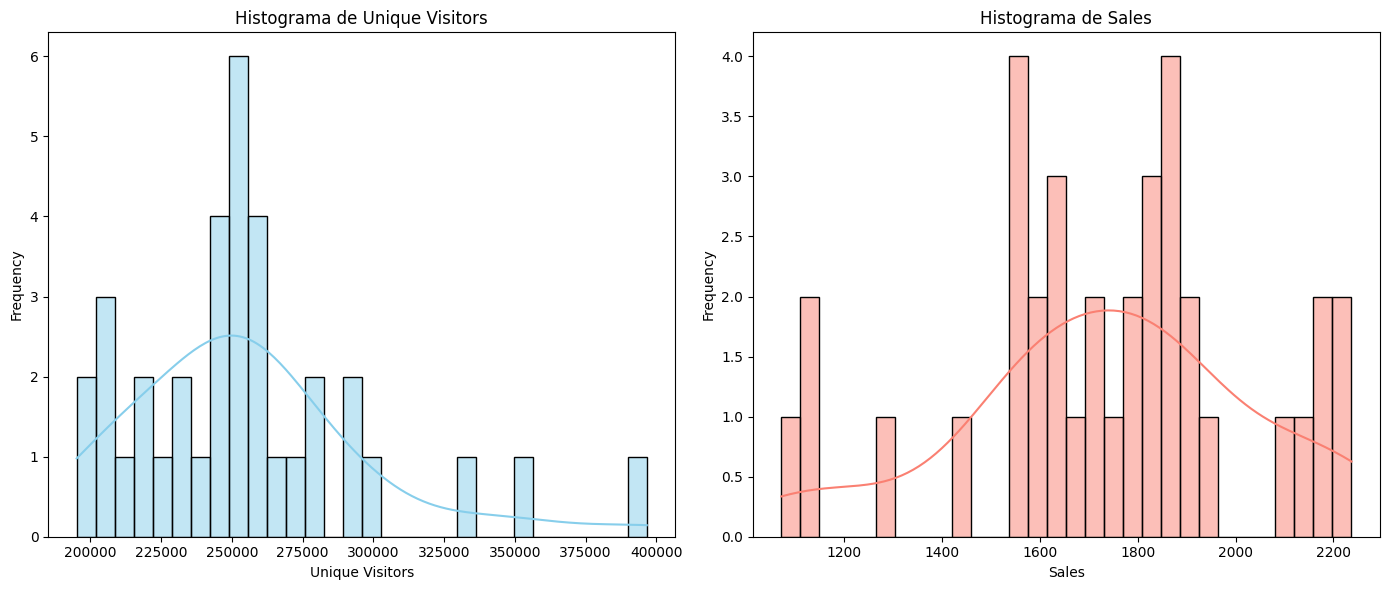

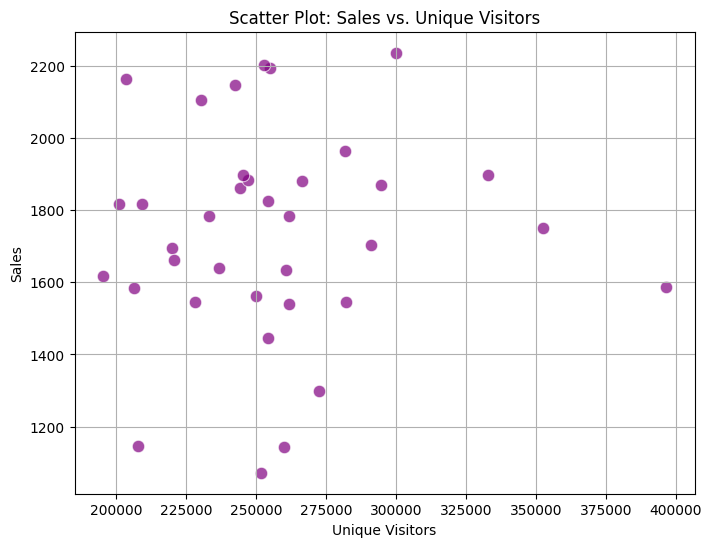

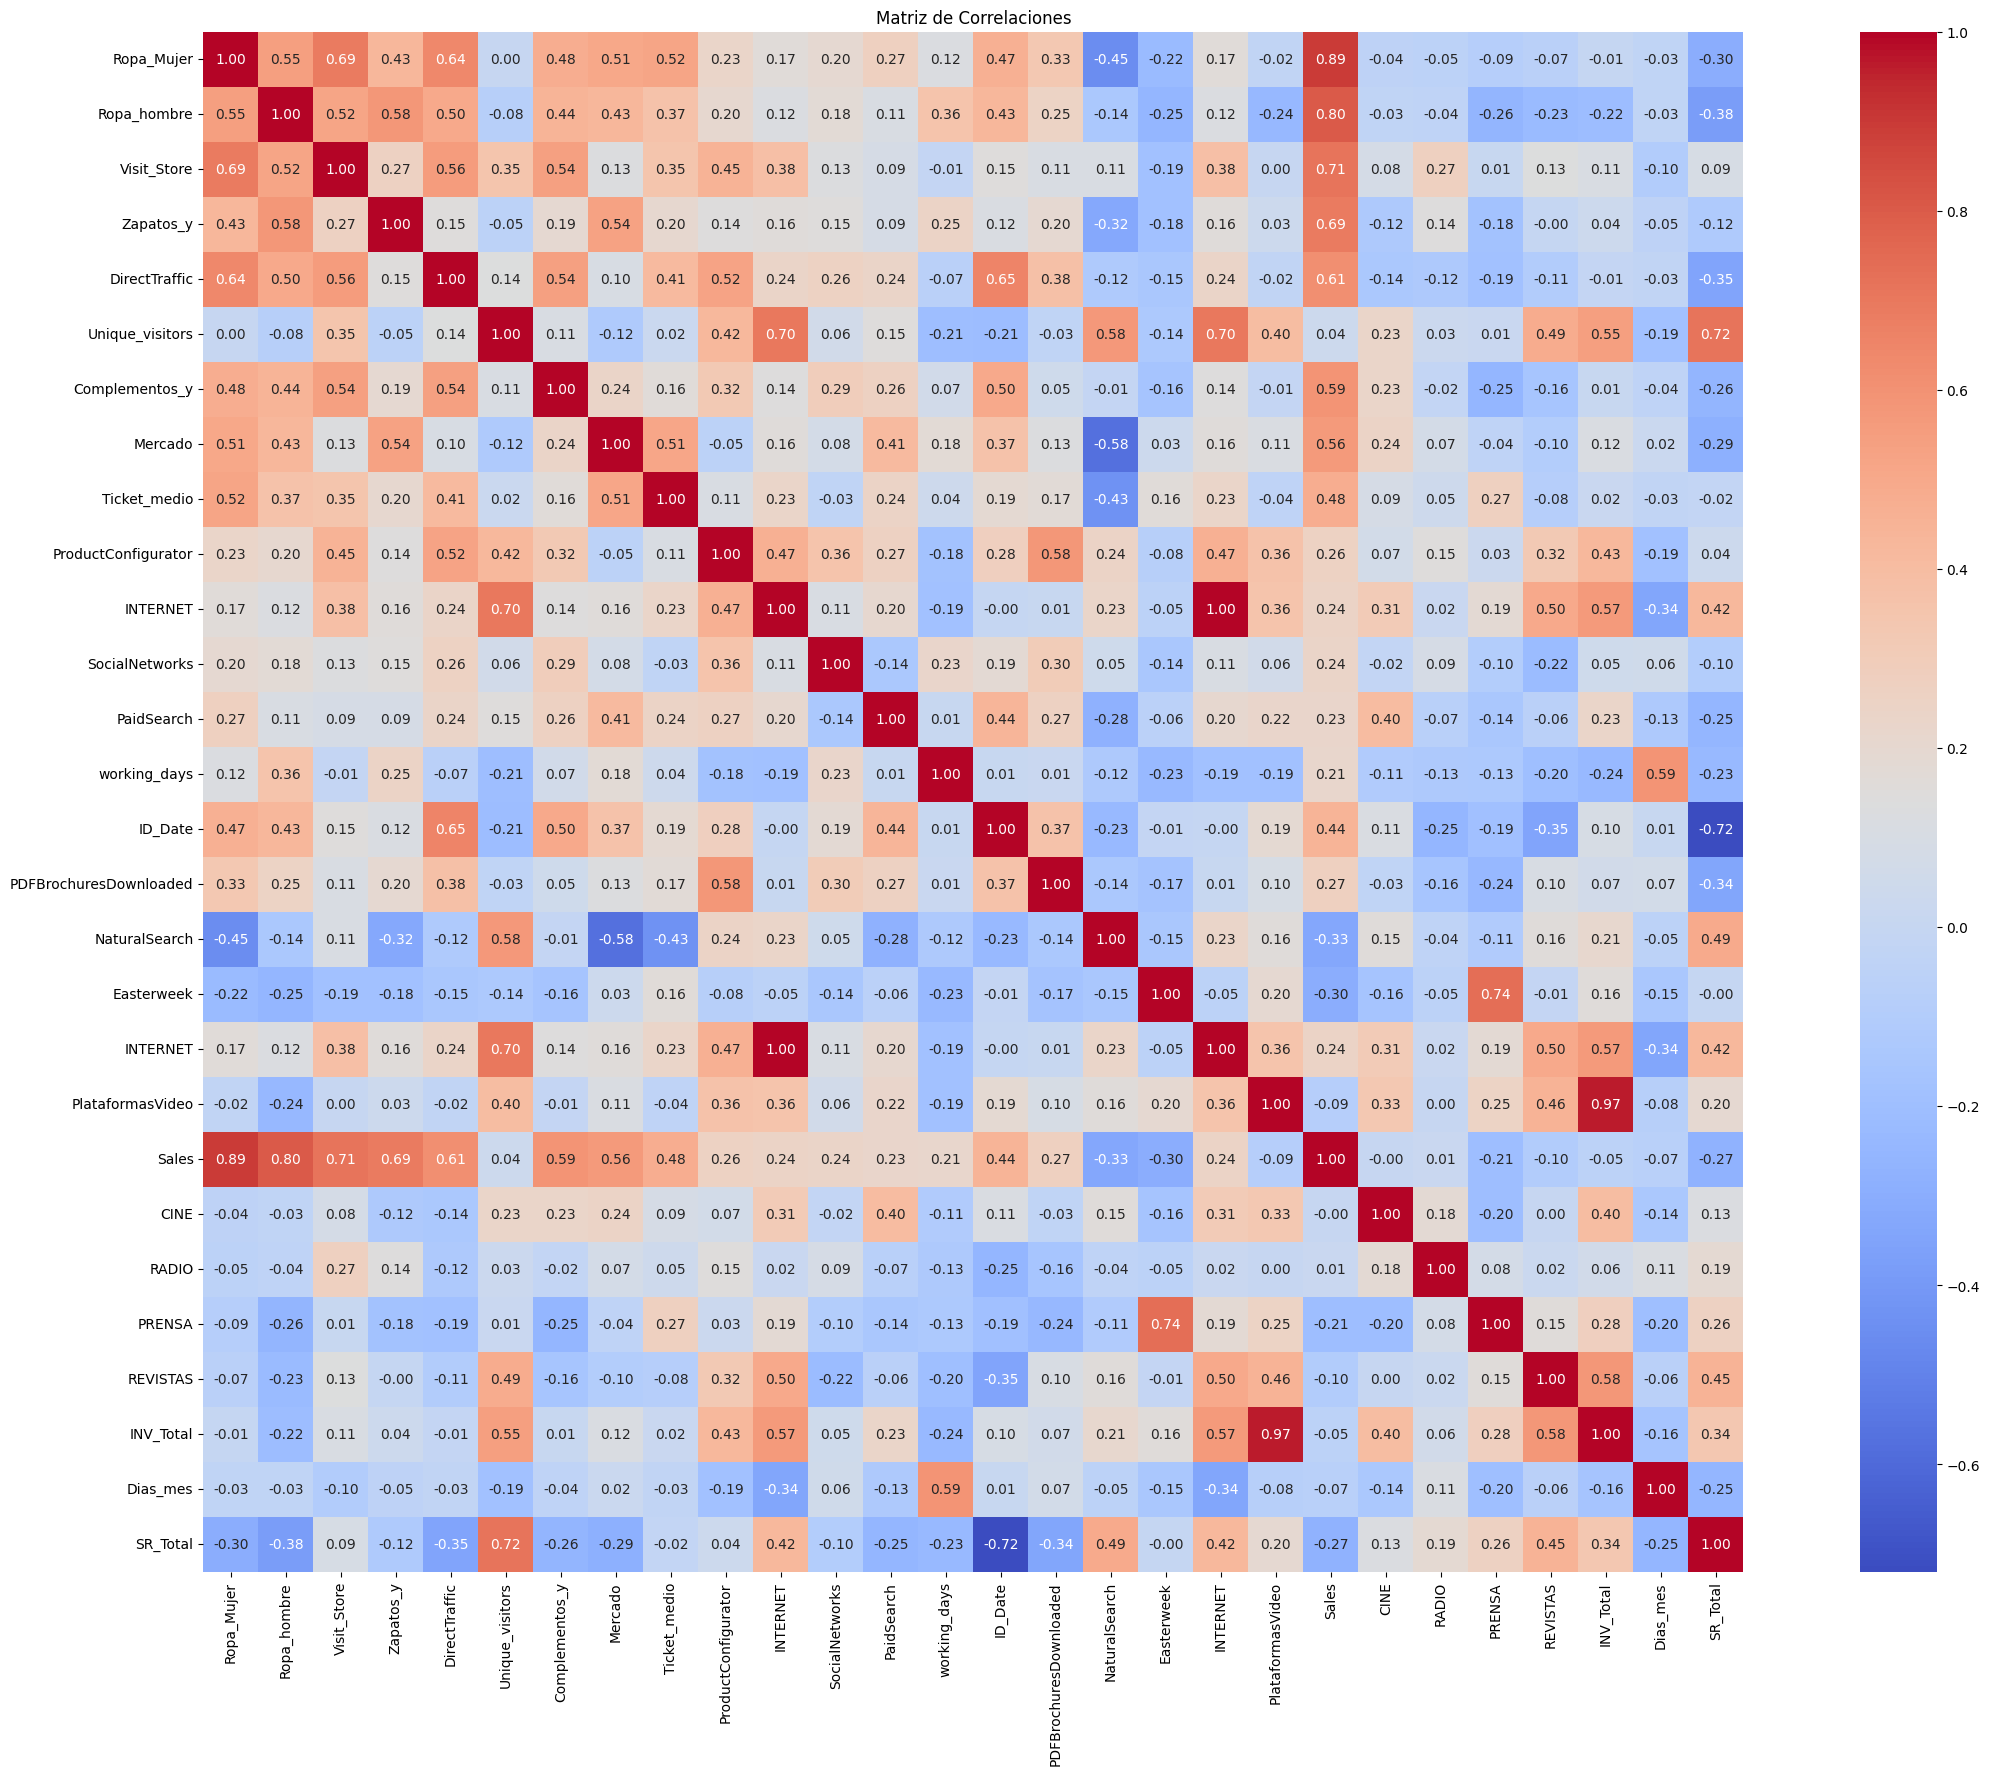

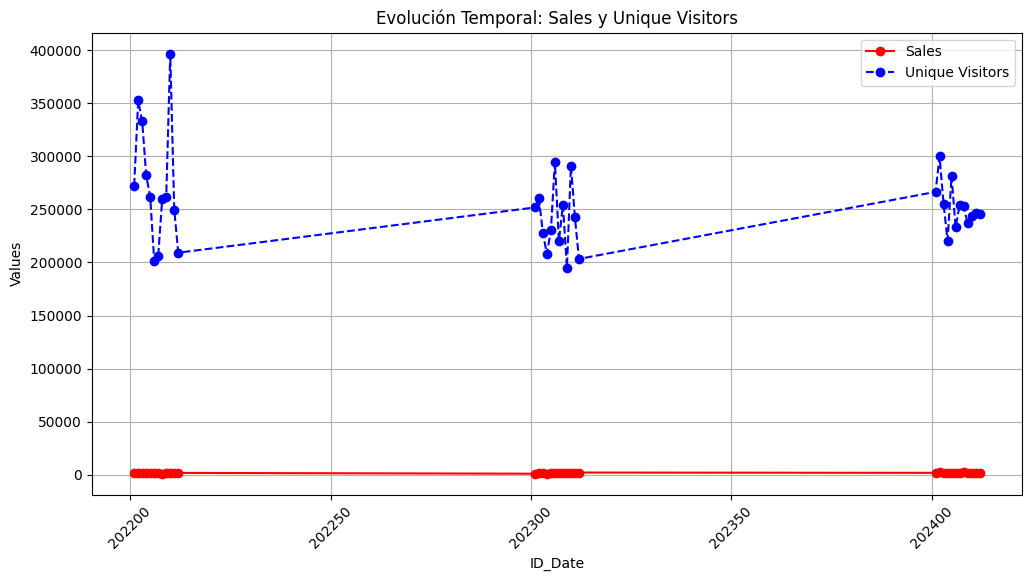

In [73]:
# Asegurarse de trabajar solo con las columnas relevantes (si es necesario):
variables = [
    'Ropa_Mujer', 'Ropa_hombre', 'Visit_Store', 'Zapatos_y', 'DirectTraffic', 'Unique_visitors', 
    'Complementos_y', 'Mercado', 'Ticket_medio', 'ProductConfigurator',
    'INTERNET', 'SocialNetworks', 'PaidSearch', 'working_days', 'ID_Date',
    'PDFBrochuresDownloaded', 'NaturalSearch', 'Easterweek', 'INTERNET', 'PlataformasVideo',
    'Sales', 'CINE', 'RADIO', 'PRENSA', 'REVISTAS', 'INV_Total', 'Dias_mes', 'SR_Total'

]

# Si df contiene otras columnas, se toma solo las mencionadas que estén presentes.
df = df[[var for var in variables if var in df.columns]]

# ============================================================================
# 1. Estadísticas Descriptivas para Sales y Unique_visitors
# ============================================================================
print("Estadísticas Descriptivas para Unique_visitors y Sales:")
print(df[["Unique_visitors", "Sales"]].describe())

# ============================================================================
# 2. Histogramas para Unique_visitors y Sales
# ============================================================================
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df["Unique_visitors"], kde=True, bins=30, color="skyblue")
plt.title("Histograma de Unique Visitors")
plt.xlabel("Unique Visitors")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.histplot(df["Sales"], kde=True, bins=30, color="salmon")
plt.title("Histograma de Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ============================================================================
# 3. Scatter Plot: Sales vs. Unique_visitors
# ============================================================================
plt.figure(figsize=(8,6))
sns.scatterplot(x="Unique_visitors", y="Sales", data=df, color="purple", s=80, alpha=0.7)
plt.title("Scatter Plot: Sales vs. Unique Visitors")
plt.xlabel("Unique Visitors")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# ============================================================================
# 4. Matriz de Correlaciones (Heatmap)
# ============================================================================
plt.figure(figsize=(30,20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlaciones")
plt.show()

# ============================================================================
# 5. Serie Temporal: Sales y Unique_visitors a lo largo de ID_Date
# ============================================================================
# Si 'ID_Date' representa fechas o períodos; en caso de que sea de tipo object, tratamos de ordenarlo:
if df["ID_Date"].dtype == object:
    # Si son strings representando fechas o periodos, se pueden ordenar alfabéticamente o transformarlas.
    df_sorted = df.sort_values("ID_Date")
else:
    df_sorted = df.sort_values("ID_Date")
    
plt.figure(figsize=(12,6))
plt.plot(df_sorted["ID_Date"], df_sorted["Sales"], marker='o', linestyle='-', color="red", label="Sales")
plt.plot(df_sorted["ID_Date"], df_sorted["Unique_visitors"], marker='o', linestyle='--', color="blue", label="Unique Visitors")
plt.xlabel("ID_Date")
plt.ylabel("Values")
plt.title("Evolución Temporal: Sales y Unique Visitors")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Estadísticas descriptivas del Conversion Ratio:
count    36.000000
mean      0.006947
std       0.001541
min       0.003999
25%       0.005817
50%       0.007014
75%       0.007713
max       0.010636
Name: Conversion_Ratio, dtype: float64


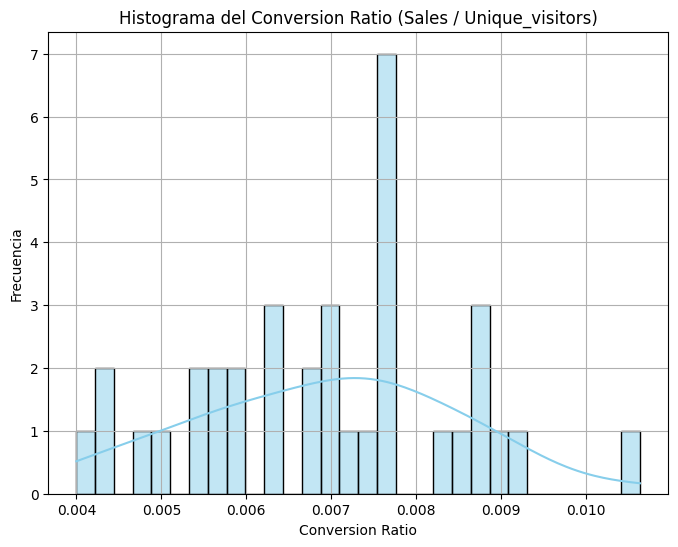

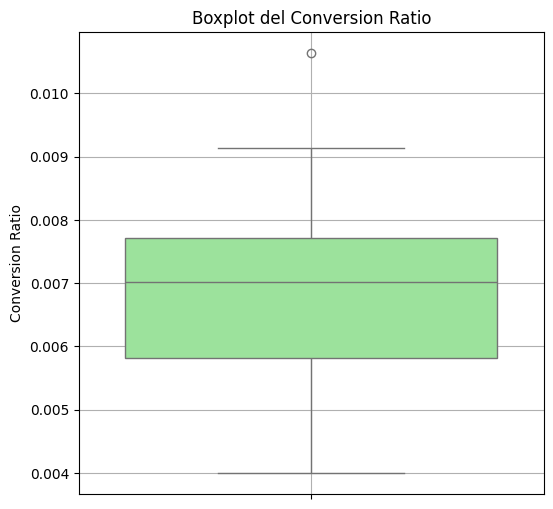

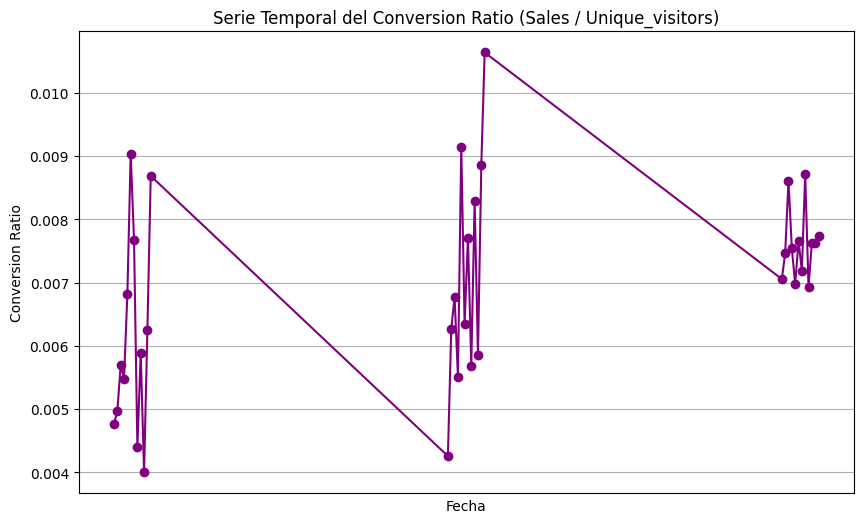

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 1. Calcular el Ratio: Sales / Unique_visitors
# -------------------------------
# Se crea una nueva columna llamada "Conversion_Ratio"
df["Conversion_Ratio"] = df["Sales"] / df["Unique_visitors"]

# Imprimir resumen descriptivo del ratio
print("Estadísticas descriptivas del Conversion Ratio:")
print(df["Conversion_Ratio"].describe())

# -------------------------------
# 2. Histograma con curva de densidad
# -------------------------------
plt.figure(figsize=(8,6))
sns.histplot(df["Conversion_Ratio"], kde=True, bins=30, color="skyblue")
plt.title("Histograma del Conversion Ratio (Sales / Unique_visitors)")
plt.xlabel("Conversion Ratio")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# -------------------------------
# 3. Box Plot del Conversion Ratio
# -------------------------------
plt.figure(figsize=(6,6))
sns.boxplot(y=df["Conversion_Ratio"], color="lightgreen")
plt.title("Boxplot del Conversion Ratio")
plt.ylabel("Conversion Ratio")
plt.grid(True)
plt.show()

# -------------------------------
# 4. Serie Temporal del Conversion Ratio
# -------------------------------
# Si "ID_Date" está en df, intentamos interpretarlo como fechas.
if "ID_Date" in df.columns:
    try:
        df["ID_Date_converted"] = pd.to_datetime(df["ID_Date"])
    except Exception as e:
        # Si falla la conversión, se usa la columna tal como esté.
        df["ID_Date_converted"] = df["ID_Date"]
    
    # Ordenamos el DataFrame por fecha (o por ID_Date_converted)
    df_sorted = df.sort_values("ID_Date_converted")
    
    plt.figure(figsize=(10,6))
    plt.plot(df_sorted["ID_Date_converted"], df_sorted["Conversion_Ratio"], marker='o', linestyle='-', color="purple")
    plt.xlabel("Fecha")
    plt.ylabel("Conversion Ratio")
    plt.title("Serie Temporal del Conversion Ratio (Sales / Unique_visitors)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [75]:
# Celda 4: Modelado de Regresión Lineal
from sklearn.linear_model import LinearRegression

# Crear y ajustar el modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones sobre el conjunto de prueba
y_pred = lr_model.predict(X_test)
# Calcular métricas de desempeño: R² y RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Evaluación del modelo de regresión lineal:")
print("R²:", r2)
print("RMSE:", rmse)

Evaluación del modelo de regresión lineal:
R²: 0.8115911641912691
RMSE: 152.08321470472856


In [77]:
descripcion_ventas = df['Sales'].describe()
print(descripcion_ventas)

count      36.000000
mean     1736.361111
std       293.745969
min      1072.000000
25%      1577.750000
50%      1768.000000
75%      1886.500000
max      2237.000000
Name: Sales, dtype: float64


In [78]:
coefficients = pd.DataFrame(lr_model.coef_, index=features, columns=['Coeficiente'])

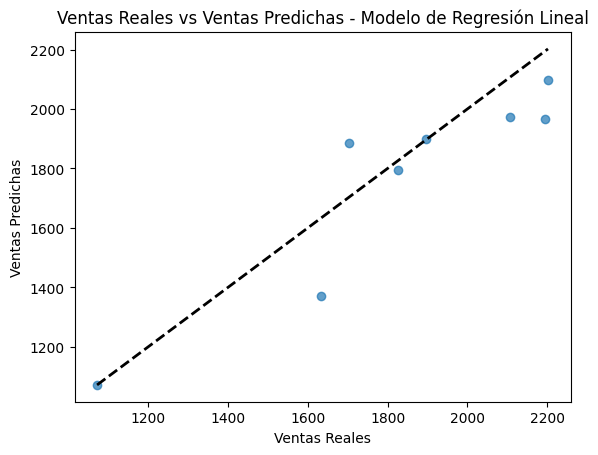

Coeficientes del modelo:
               Coeficiente
Visit_Store     180.429179
Easterweek      -60.251247
Ticket_medio     42.434774
ID_Date          58.218696
working_days     32.746006
NaturalSearch   -96.754551


In [79]:
# Celda 6: Interpretación y Comunicación de Resultados
# Graficar las ventas reales vs. las ventas predichas
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Ventas Reales")
plt.ylabel("Ventas Predichas")
plt.title("Ventas Reales vs Ventas Predichas - Modelo de Regresión Lineal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

print("Coeficientes del modelo:")
print(coefficients)

In [80]:
import statsmodels.api as sm

# Agregar la constante (intercepto) a las variables independientes
X_const = sm.add_constant(X_scaled)

# Ajustar el modelo OLS (mínimos cuadrados ordinarios)
modelo_ols = sm.OLS(y, X_const)
resultado = modelo_ols.fit()

# Mostrar el resumen del modelo
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     20.45
Date:               lu., 21 abr. 2025   Prob (F-statistic):           3.29e-09
Time:                        13:43:39   Log-Likelihood:                -225.37
No. Observations:                  36   AIC:                             464.7
Df Residuals:                      29   BIC:                             475.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.3611     23.518     73.830      0.0

In [81]:
import statsmodels.formula.api as smf


df["Budget_Online"] = df[["INTERNET", "SocialNetworks", "PlataformasVideo"]].sum(axis=1)

# Calcular Budget_Offline a partir de la suma de las variables offline
df["Budget_Offline"] = df[["RADIO", "CINE", "PRENSA", "REVISTAS"]].sum(axis=1)

# -----------------------------------------------------------------------------
# 3. Crear la variable Sales_lag (ventas del período anterior)
# -----------------------------------------------------------------------------

lag = 1  # Si se desea usar el lag de dos meses, se asigna lag = 2
df["Sales_lag"] = df["Sales"].shift(lag)
df = df.dropna(subset=["Sales_lag"])

# -----------------------------------------------------------------------------
# 4. (Opcional) Definir variables extras si están disponibles
# -----------------------------------------------------------------------------

features_extras = []
for feat in ['Visit_Store', 'Easterweek', 'Ticket_medio',
    'ID_Date', 'working_days', 'NaturalSearch']:
    if feat in df.columns:
        features_extras.append(feat)

# -----------------------------------------------------------------------------
# 5. Especificar y ajustar el modelo de regresión lineal
#
# El modelo es:
#    Sales = β₀ + β₁ · Sales_lag + β₂ · Budget_Online + β₃ · Budget_Offline + Σ βᵢ · (featureᵢ)
#
# Donde las betas multiplican a las variables (excepto β₀, que se suma).
# -----------------------------------------------------------------------------

# Construir la fórmula de la regresión
formula = "Sales ~ Sales_lag + Budget_Online + Budget_Offline"
for feat in features_extras:
    formula += f" + {feat}"

print("Fórmula del modelo:")
print(formula)

# Ajustar el modelo con OLS (mínimos cuadrados ordinarios)
modelo_s = smf.ols(formula, data=df).fit()

# Mostrar el resumen del modelo (incluye el intercepto y las betas)
print(modelo_s.summary())

Fórmula del modelo:
Sales ~ Sales_lag + Budget_Online + Budget_Offline + Visit_Store + Easterweek + Ticket_medio + ID_Date + working_days + NaturalSearch
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     13.96
Date:               lu., 21 abr. 2025   Prob (F-statistic):           1.04e-07
Time:                        13:43:39   Log-Likelihood:                -215.94
No. Observations:                  35   AIC:                             451.9
Df Residuals:                      25   BIC:                             467.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|

In [82]:
import cvxpy as cp
import numpy as np
import pandas as pd

# -----------------------------------------------------------------------------
# 1. Crear una copia de df y renombrar las columnas para el modelo de Sales
#    Se añade el sufijo _sales para evitar conflictos con otros modelos.
# -----------------------------------------------------------------------------
df_sales = df.copy()
rename_dict = {
    "Sales_lag":           "Sales_lag_sales",
    "Budget_Online":       "Budget_Online_sales",
    "Budget_Offline":      "Budget_Offline_sales",
    "ID_Date":             "ID_Date_sales",
    "NaturalSearch":       "NaturalSearch_sales",
    "Visit_Store":         "Visit_Store_sales",
    "Ticket_medio":        "Ticket_medio_sales",
    "working_days":        "working_days_sales",
    "Easterweek":          "Easterweek_sales"
}
df_sales.rename(columns=rename_dict, inplace=True)

# -----------------------------------------------------------------------------
# 2. Definir la lista de predictores para el modelo de Sales
# -----------------------------------------------------------------------------
predictors_completo = [
    "Sales_lag_sales", "Budget_Online_sales", "Budget_Offline_sales",
    "ID_Date_sales", "NaturalSearch_sales", "Visit_Store_sales",
    "Ticket_medio_sales", "working_days_sales", "Easterweek_sales"
]
predictors = [var for var in predictors_completo if var in df_sales.columns]
print("Predictors utilizados para el modelo Sales:", predictors)

# -----------------------------------------------------------------------------
# 3. Preparar la matriz de características X y la variable dependiente y
# -----------------------------------------------------------------------------
X = df_sales[predictors].values          # Matriz (n, p)
# La variable dependiente para este modelo es Sales (sin sufijo)
y = df_sales["Sales"].values.reshape(-1, 1)  # Vector columna (n, 1)
n, p = X.shape

# -----------------------------------------------------------------------------
# 4. Definir el modelo en CVXPY: Sales_pred = β₀ + X·β
# Se fuerza que los coeficientes asociados a Budget_Online_sales y Budget_Offline_sales sean > eps.
# Los otros coeficientes se dejan sin restricción.
# -----------------------------------------------------------------------------
eps = 1e-5  # Valor mínimo permitido (puedes ajustar este valor)

beta0 = cp.Variable()       # Intercepto
beta = cp.Variable(p)       # Coeficientes

constraints = []
for i, name in enumerate(predictors):
    if name in ["Budget_Online_sales", "Budget_Offline_sales"]:
        constraints.append(beta[i] >= eps)

# -----------------------------------------------------------------------------
# 5. Definir la función objetivo Ridge:
# Minimizar: 0.5*||y - (β₀ + X·β)||² + lambda_val*||β||²
# -----------------------------------------------------------------------------
lambda_val = 1.0  # Ajusta la regularización si lo consideras necesario
pred = beta0 + X @ beta
objective = cp.Minimize(0.5 * cp.sum_squares(y - pred) + lambda_val * cp.sum_squares(beta))
problem = cp.Problem(objective, constraints)

# -----------------------------------------------------------------------------
# 6. Resolver el problema usando un solver (por ejemplo, SCS) con max_iter elevado
# -----------------------------------------------------------------------------
result = problem.solve(solver=cp.SCS, max_iters=100000)
print("Estado del problema (Sales):", problem.status)

if beta.value is None:
    print("No se encontró solución. Puede que las restricciones sean demasiado estrictas.")
else:
    print("Intercepto (β₀):", beta0.value)
    coef_dict = {name: beta.value[i] for i, name in enumerate(predictors)}
    for name, coef in coef_dict.items():
        print(f"{name}: {coef:.6f}")

    print("\nVerificación de restricciones para variables de inversión:")
    for name in ["Budget_Online_sales", "Budget_Offline_sales"]:
        if name in coef_dict:
            if coef_dict[name] < eps:
                print(f"Advertencia: {name} = {coef_dict[name]:.6f} no cumple la restricción (> {eps}).")
            else:
                print(f"{name} cumple la restricción (> {eps}).")


Predictors utilizados para el modelo Sales: ['Sales_lag_sales', 'Budget_Online_sales', 'Budget_Offline_sales', 'ID_Date_sales', 'NaturalSearch_sales', 'Visit_Store_sales', 'Ticket_medio_sales', 'working_days_sales', 'Easterweek_sales']
Estado del problema (Sales): optimal
Intercepto (β₀): 3299.0634754688826
Sales_lag_sales: -0.000209
Budget_Online_sales: 0.000010
Budget_Offline_sales: 0.000010
ID_Date_sales: -0.007677
NaturalSearch_sales: -0.000074
Visit_Store_sales: -0.000663
Ticket_medio_sales: -0.047112
working_days_sales: 0.752491
Easterweek_sales: -2.052136

Verificación de restricciones para variables de inversión:
Advertencia: Budget_Online_sales = 0.000010 no cumple la restricción (> 1e-05).
Budget_Offline_sales cumple la restricción (> 1e-05).


In [83]:
# Definir variable dependiente (objetivo) y variables independientes (features)
target = 'Unique_visitors'
features = [
    "ID_Date",
    "NaturalSearch",
    "Visit_Store",
    "SR_Total",
    "INV_Total",
    "ProductConfigurator",
]
X = df[features]
y = df[target]

In [84]:
import statsmodels.formula.api as smf


if "Budget_Online" not in df.columns:
    df["Budget_Online"] = df[["INTERNET", "SocialNetworks", "PlataformasVideo"]].sum(axis=1)

# Calcular Budget_Offline a partir de la suma de las variables offline
df["Budget_Offline"] = df[["RADIO", "CINE", "PRENSA", "REVISTAS"]].sum(axis=1)

# -----------------------------------------------------------------------------
# 3. Crear la variable Sales_lag (ventas del período anterior)
# -----------------------------------------------------------------------------

lag = 1  # Si se desea usar el lag de dos meses, se asigna lag = 2
df["Unique_visitors_lag"] = df["Unique_visitors"].shift(lag)
df = df.dropna(subset=["Unique_visitors_lag"])

# -----------------------------------------------------------------------------
# 4. (Opcional) Definir variables extras si están disponibles
# -----------------------------------------------------------------------------

features_extras_uv = []
for feat in [
    "ID_Date",
    "NaturalSearch",
    "Visit_Store",
    "SR_Total",
    "INV_Total",
    "ProductConfigurator",]:
    if feat in df.columns:
        features_extras_uv.append(feat)

# -----------------------------------------------------------------------------
# 5. Especificar y ajustar el modelo de regresión lineal
#
# El modelo es:
#    Sales = β₀ + β₁ · Sales_lag + β₂ · Budget_Online + β₃ · Budget_Offline + Σ βᵢ · (featureᵢ)
#
# Donde las betas multiplican a las variables (excepto β₀, que se suma).
# -----------------------------------------------------------------------------

# Construir la fórmula de la regresión
formula_uv = "Unique_visitors ~ Unique_visitors_lag + Budget_Online + Budget_Offline"
for feat in features_extras_uv:
    formula_uv += f" + {feat}"

print("Fórmula del modelo:")
print(formula_uv)

# Ajustar el modelo con OLS (mínimos cuadrados ordinarios)
modelo_uv = smf.ols(formula_uv, data=df).fit()

# Mostrar el resumen del modelo (incluye el intercepto y las betas)
print(modelo_uv.summary())

Fórmula del modelo:
Unique_visitors ~ Unique_visitors_lag + Budget_Online + Budget_Offline + ID_Date + NaturalSearch + Visit_Store + SR_Total + INV_Total + ProductConfigurator
                            OLS Regression Results                            
Dep. Variable:        Unique_visitors   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     10.43
Date:               lu., 21 abr. 2025   Prob (F-statistic):           2.28e-06
Time:                        13:43:40   Log-Likelihood:                -381.13
No. Observations:                  34   AIC:                             782.3
Df Residuals:                      24   BIC:                             797.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    

In [85]:
import cvxpy as cp
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# -----------------------------------------------------------------------------
# 1. Definir la lista de predictores deseados para el modelo Unique_visitors
# -----------------------------------------------------------------------------
predictors_completo_uv = [
    "Unique_visitors_lag", "Budget_Online", "Budget_Offline",
    "ID_Date", "NaturalSearch", "Visit_Store", "SR_Total", "INV_Total", "ProductConfigurator"
]
predictors_uv = [var for var in predictors_completo_uv if var in df.columns]
print("Predictors utilizados:", predictors_uv)

# -----------------------------------------------------------------------------
# 2. Preparar la matriz de características X y la variable dependiente y
# -----------------------------------------------------------------------------
X_uv = df[predictors_uv].values          # Matriz (n, p)
y_uv = df["Unique_visitors"].values.reshape(-1, 1)  # Vector columna (n, 1)

# (Opcional) Normalizamos las variables para evitar problemas de escala
scaler = StandardScaler()
X_uv_scaled = scaler.fit_transform(X_uv)

n_uv, p_uv = X_uv_scaled.shape

# -----------------------------------------------------------------------------
# 3. Definir el modelo en CVXPY: Unique_visitors_pred = β₀ + X·β
# Se impone que únicamente los coeficientes asociados a Budget_Online y Budget_Offline sean > eps.
# No se imponen restricciones para el resto de las variables.
# -----------------------------------------------------------------------------
eps_uv = 1e-8   # Valor mínimo permitido para Budget_Online y Budget_Offline

beta0_uv = cp.Variable()       # Intercepto
beta_uv    = cp.Variable(p_uv) # Coeficientes

constraints_uv = []
for i, name in enumerate(predictors_uv):
    if name in ["Budget_Online", "Budget_Offline"]:
        constraints_uv.append(beta_uv[i] >= eps_uv)
# Solo se imponen restricciones a las variables de inversión.

# -----------------------------------------------------------------------------
# 4. Definir la función objetivo (modelo Ridge):
# Minimizar: 0.5 * || y - (β₀ + X β) ||² + lambda_val * ||β||²
# -----------------------------------------------------------------------------
lambda_val = 1.0  # Parámetro de regularización (ajusta si lo consideras necesario)
pred_uv = beta0_uv + X_uv_scaled @ beta_uv
objective_uv = cp.Minimize(0.5 * cp.sum_squares(y_uv - pred_uv) + lambda_val * cp.sum_squares(beta_uv))
problem_uv = cp.Problem(objective_uv, constraints_uv)

# -----------------------------------------------------------------------------
# 5. Resolver el problema con el solver SCS (con más iteraciones)
# -----------------------------------------------------------------------------
result_uv = problem_uv.solve(solver=cp.SCS, max_iters=100000)
print("Estado del problema:", problem_uv.status)

if beta_uv.value is None:
    print("No se encontró solución. Puede que las restricciones sean demasiado estrictas.")
else:
    print("Intercepto (β₀):", beta0_uv.value)
    coef_dict_uv = {name: beta_uv.value[i] for i, name in enumerate(predictors_uv)}
    for name, coef in coef_dict_uv.items():
        print(f"{name}: {coef:.6f}")

    print("\nVerificación de restricciones para variables de inversión:")
    for name in ["Budget_Online", "Budget_Offline"]:
        if name in coef_dict_uv:
            if coef_dict_uv[name] < eps_uv:
                print(f"Advertencia: {name} = {coef_dict_uv[name]:.6f} no cumple la restricción (> {eps_uv}).")
            else:
                print(f"{name} cumple la restricción (> {eps_uv}).")


Predictors utilizados: ['Unique_visitors_lag', 'Budget_Online', 'Budget_Offline', 'ID_Date', 'NaturalSearch', 'Visit_Store', 'SR_Total', 'INV_Total', 'ProductConfigurator']
Estado del problema: infeasible
No se encontró solución. Puede que las restricciones sean demasiado estrictas.


In [86]:
predictors_completo_uv = [
    "Unique_visitors_lag", "Budget_Online", "Budget_Offline",
    "ID_Date", "NaturalSearch", "Visit_Store", "SR_Total", "INV_Total", "ProductConfigurator"
]

In [87]:
import numpy as np
import pandas as pd

# Supongamos que estos son los rangos de inversión:
offline_range = np.arange(2_000_000, 10_000_001, 2_000_000)  # 2M,4M,6M,8M,10M
online_range  = np.arange(1_000_000,  5_000_001, 1_000_000)  # 1M,2M,3M,4M,5M

# 1. Construir el DataFrame de escenarios (inicialmente con solo las inversiones)
scenarios = []
for off in offline_range:
    for on in online_range:
        scenarios.append({
            "Budget_Offline": off,
            "Budget_Online": on
        })
df_scenarios = pd.DataFrame(scenarios)

# 2. Lista completa de predictores que usó el modelo (según la fórmula original)
predictors_completo_uv = [
    "Unique_visitors_lag", "Budget_Online", "Budget_Offline",
    "ID_Date", "NaturalSearch", "Visit_Store", "SR_Total", "INV_Total", "ProductConfigurator"
]

# 3. Para cada predictor que no esté en df_scenarios, lo agregamos con un valor fijo
# Por ejemplo, usaremos la media de ese predictor en el DataFrame original (df) si existe.
for var in predictors_completo_uv:
    if var not in df_scenarios.columns:
        if var in df.columns:
            fixed_val = df[var].mean()
        else:
            fixed_val = 0  # o algún valor por defecto
        df_scenarios[var] = fixed_val

# Ya con esto, df_scenarios tendrá todas las variables requeridas por el modelo.
print("Columnas en el DataFrame de escenarios:", df_scenarios.columns.tolist())

# 4. Ahora puedes predecir:
df_scenarios["pred_unique_visitors"] = modelo_uv.predict(df_scenarios)
df_scenarios["pred_sales"] = modelo_uv.predict(df_scenarios)

# 5. Calcular el ratio y mostrar resultados:
df_scenarios["ratio"] = df_scenarios["pred_sales"] / df_scenarios["pred_unique_visitors"]

print("Algunos escenarios:")
print(df_scenarios.head(10))
print("\nResumen estadístico del ratio:")
print(df_scenarios["ratio"].describe())

best_scenario = df_scenarios.loc[df_scenarios["ratio"].idxmax()]
print("\nMejor escenario para ratio (según estos rangos):")
best_scenario



Columnas en el DataFrame de escenarios: ['Budget_Offline', 'Budget_Online', 'Unique_visitors_lag', 'ID_Date', 'NaturalSearch', 'Visit_Store', 'SR_Total', 'INV_Total', 'ProductConfigurator']
Algunos escenarios:
   Budget_Offline  Budget_Online  Unique_visitors_lag        ID_Date  \
0         2000000        1000000             255468.0  202312.676471   
1         2000000        2000000             255468.0  202312.676471   
2         2000000        3000000             255468.0  202312.676471   
3         2000000        4000000             255468.0  202312.676471   
4         2000000        5000000             255468.0  202312.676471   
5         4000000        1000000             255468.0  202312.676471   
6         4000000        2000000             255468.0  202312.676471   
7         4000000        3000000             255468.0  202312.676471   
8         4000000        4000000             255468.0  202312.676471   
9         4000000        5000000             255468.0  202312.676471  

Budget_Offline          2.000000e+06
Budget_Online           1.000000e+06
Unique_visitors_lag     2.554680e+05
ID_Date                 2.023127e+05
NaturalSearch           1.597264e+05
Visit_Store             6.108971e+03
SR_Total                1.574042e+05
INV_Total               5.665634e+05
ProductConfigurator     4.361562e+04
pred_unique_visitors    3.628048e+05
pred_sales              3.628048e+05
ratio                   1.000000e+00
Name: 0, dtype: float64

In [88]:
df_scenarios

,Budget_Offline,Budget_Online,Unique_visitors_lag,ID_Date,NaturalSearch,Visit_Store,SR_Total,INV_Total,ProductConfigurator,pred_unique_visitors,pred_sales,ratio
0,2000000,1000000,255468.0,202312.676471,159726.411765,6108.970588,157404.235294,566563.445368,43615.617647,3.628048e+05,3.628048e+05,1.0
1,2000000,2000000,255468.0,202312.676471,159726.411765,6108.970588,157404.235294,566563.445368,43615.617647,5.105728e+05,5.105728e+05,1.0
2,2000000,3000000,255468.0,202312.676471,159726.411765,6108.970588,157404.235294,566563.445368,43615.617647,6.583408e+05,6.583408e+05,1.0
3,2000000,4000000,255468.0,202312.676471,159726.411765,6108.970588,157404.235294,566563.445368,43615.617647,8.061088e+05,8.061088e+05,1.0
4,2000000,5000000,255468.0,202312.676471,159726.411765,6108.970588,157404.235294,566563.445368,43615.617647,9.538768e+05,9.538768e+05,1.0
5,4000000,1000000,255468.0,202312.676471,159726.411765,6108.970588,157404.235294,566563.445368,43615.617647,4.161412e+05,4.161412e+05,1.0
6,4000000,2000000,255468.0,202312.676471,159726.411765,6108.970588,157404.235294,566563.445368,43615.617647,5.639092e+05,5.639092e+05,1.0
7,4000000,3000000,255468.0,202312.676471,159726.411765,6108.970588,157404.235294,566563.445368,43615.617647,7.116772e+05,7.116772e+05,1.0
8,4000000,4000000,255468.0,202312.676471,159726.411765,6108.970588,157404.235294,566563.445368,43615.617647,8.594452e+05,8.594452e+05,1.0
9,4000000,5000000,255468.0,202312.676471,159726.411765,6108.970588,157404.235294,566563.445368,43615.617647,1.007213e+06,1.007213e+06,1.0


In [89]:
import numpy as np
import pandas as pd

# -------------------------
# 1. Definir presupuestos base
# -------------------------
# Estimamos el presupuesto de 2024 a partir de la media de las columnas en el DataFrame original.
base_Budget_Online = df["Budget_Online"].mean()
base_Budget_Offline = df["Budget_Offline"].mean()

# -------------------------
# 2. Definir los factores de incremento para cada periodo
# -------------------------
# Los factores son: 
#   - Primeros 6 meses: 1.15 (incremento del 15%)
#   - Siguientes 6 meses: 1.21 (incremento del 21%)
#   - Año siguiente: 1.25 (incremento del 25%)
factors = {
    "Primeros6m": 1.15,
    "Siguientes6m": 1.21,
    "AnioSiguiente": 1.25
}

# -------------------------
# 3. Construir un DataFrame de escenarios
# -------------------------
scenarios = []
for period, factor in factors.items():
    scenario = {
        "Period": period,
        "Budget_Online": base_Budget_Online * factor,
        "Budget_Offline": base_Budget_Offline * factor
    }
    # Completar con variables adicionales fijas, necesarias para que la función predict del modelo no falle.
    # Se asigna la media (o un valor representativo) de cada variable, extraído del DataFrame original.
    if "Unique_visitors_lag" in df.columns:
        scenario["Unique_visitors_lag"] = df["Unique_visitors_lag"].mean()
    if "ID_Date" in df.columns:
        # Si ID_Date no es numérica, puedes asignar otro valor representativo o eliminarla del modelo.
        scenario["ID_Date"] = df["ID_Date"].mean()  
    if "NaturalSearch" in df.columns:
        scenario["NaturalSearch"] = df["NaturalSearch"].mean()
    if "Visit_Store" in df.columns:
        scenario["Visit_Store"] = df["Visit_Store"].mean()
    if "SR_Total" in df.columns:
        scenario["SR_Total"] = df["SR_Total"].mean()
    if "INV_Total" in df.columns:
        scenario["INV_Total"] = df["INV_Total"].mean()
    if "ProductConfigurator" in df.columns:
        scenario["ProductConfigurator"] = df["ProductConfigurator"].mean()
    if "Sales_lag" in df.columns:
        scenario["Sales_lag"] = df["Sales_lag"].mean()
    if "working_days" in df.columns:
        scenario["working_days"] = df["working_days"].mean()
    if "Easterweek" in df.columns:
        scenario["Easterweek"] = df["Easterweek"].mean()
    if "Ticket_medio" in df.columns:
        scenario["Ticket_medio"] = df["Ticket_medio"].mean()
    
    scenarios.append(scenario)

df_scenarios = pd.DataFrame(scenarios)
print("Escenarios de inversión:")
print(df_scenarios)

# -------------------------
# 4. Predecir unique_visitors y sales con los modelos entrenados
# -------------------------
# Se asume que:
# - modelo_uv.predict(df_scenarios) predice unique_visitors.
# - modelo_s.predict(df_scenarios) predice sales.
# Si algún modelo necesita columnas con un nombre distinto, deberás renombrarlas o crear una copia.
df_scenarios["pred_unique_visitors"] = modelo_uv.predict(df_scenarios)
df_scenarios["pred_sales"] = modelo_s.predict(df_scenarios)

# -------------------------
# 5. Calcular el ratio (sales / unique_visitors)
# -------------------------
df_scenarios["ratio"] = df_scenarios["pred_sales"] / df_scenarios["pred_unique_visitors"]

# -------------------------
# 6. Mostrar un resumen de resultados y seleccionar el mejor escenario
# -------------------------
print("\nAlgunos escenarios:")
print(df_scenarios.head(10))

print("\nResumen estadístico del ratio:")
print(df_scenarios["ratio"].describe())

best_scenario = df_scenarios.loc[df_scenarios["ratio"].idxmax()]
print("\nMejor escenario para ratio (según estos rangos):")
print(best_scenario)



Escenarios de inversión:
          Period  Budget_Online  Budget_Offline  Unique_visitors_lag  \
0     Primeros6m  689115.159643    88971.066792             255468.0   
1   Siguientes6m  725068.994060    93613.035494             255468.0   
2  AnioSiguiente  749038.217004    96707.681296             255468.0   

         ID_Date  NaturalSearch  Visit_Store       SR_Total      INV_Total  \
0  202312.676471  159726.411765  6108.970588  157404.235294  566563.445368   
1  202312.676471  159726.411765  6108.970588  157404.235294  566563.445368   
2  202312.676471  159726.411765  6108.970588  157404.235294  566563.445368   

   ProductConfigurator  Sales_lag  working_days  Easterweek  Ticket_medio  
0         43615.617647     1744.5     21.794118    0.088235     78.852941  
1         43615.617647     1744.5     21.794118    0.088235     78.852941  
2         43615.617647     1744.5     21.794118    0.088235     78.852941  

Algunos escenarios:
          Period  Budget_Online  Budget_Offline 

### PREDICCIÓN

Columnas en df_scenarios:
['Period', 'Budget_Online', 'Budget_Offline', 'Unique_visitors_lag', 'ID_Date', 'NaturalSearch', 'Visit_Store', 'SR_Total', 'INV_Total', 'ProductConfigurator', 'Sales_lag', 'working_days', 'Easterweek', 'Ticket_medio']


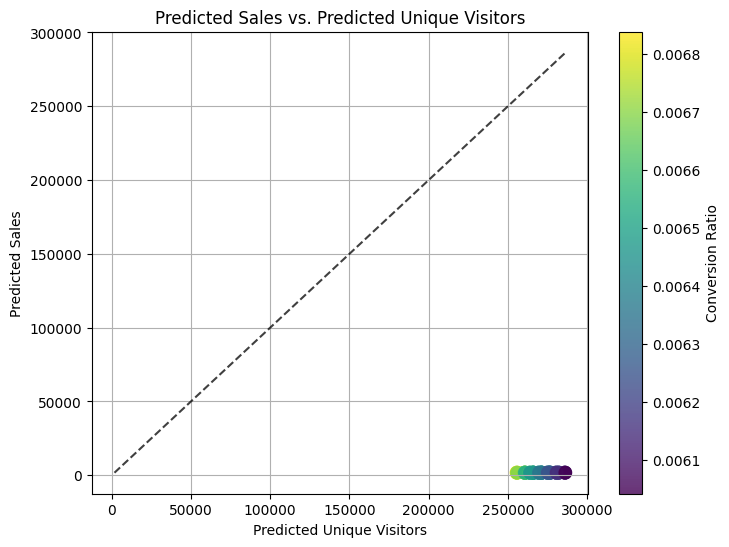

C:\Users\1cnac\AppData\Local\Temp\ipykernel_21772\3919945529.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_by_period = df_scenarios.groupby("Period")["ratio"].mean()


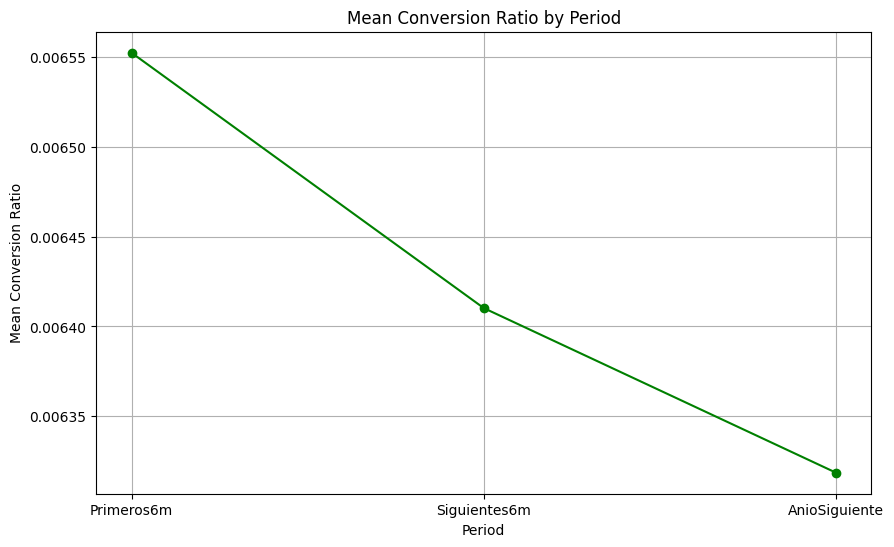

C:\Users\1cnac\AppData\Local\Temp\ipykernel_21772\3919945529.py:103: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  online_investment = df_scenarios.groupby("Period")["Budget_Online"].mean() / 1e6  # en millones
C:\Users\1cnac\AppData\Local\Temp\ipykernel_21772\3919945529.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  offline_investment = df_scenarios.groupby("Period")["Budget_Offline"].mean() / 1e6  # en millones


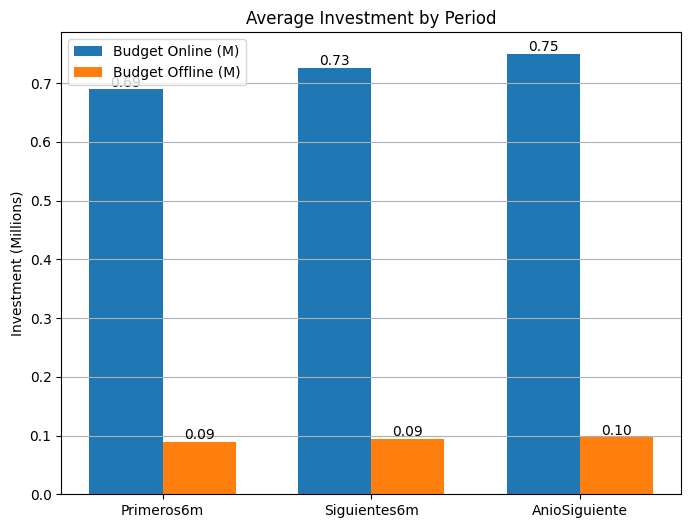

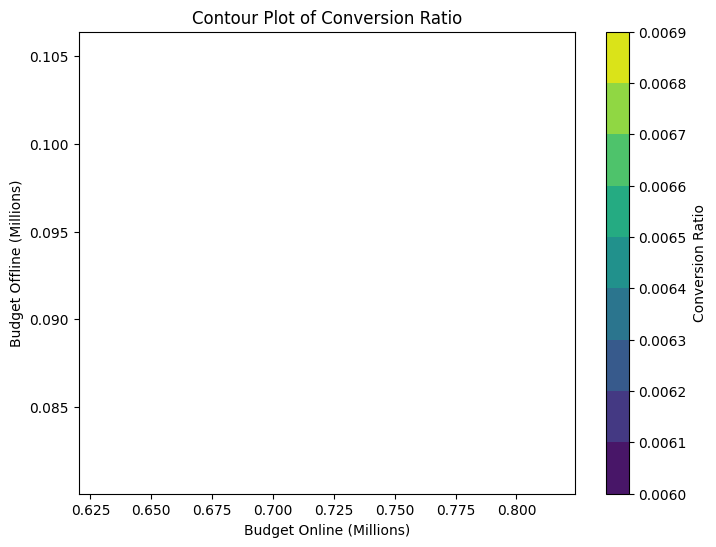


Mejor escenario según el ratio:
Period                     Primeros6m
Budget_Online           620203.643679
Budget_Offline           80073.960113
Unique_visitors_lag          255468.0
ID_Date                 202312.676471
NaturalSearch           159726.411765
Visit_Store               6108.970588
SR_Total                157404.235294
INV_Total               566563.445368
ProductConfigurator      43615.617647
Sales_lag                      1744.5
working_days                21.794118
Easterweek                   0.088235
Ticket_medio                78.852941
pred_unique_visitors    255482.037671
pred_sales                1747.072173
ratio                        0.006838
Name: 0, dtype: object


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1. Definir presupuestos base (2024)
# -------------------------
base_Budget_Online = df["Budget_Online"].mean()
base_Budget_Offline = df["Budget_Offline"].mean()

# -------------------------
# 2. Definir los factores de incremento por periodo
# -------------------------
factors = {
    "Primeros6m": 1.15,   # +15%
    "Siguientes6m": 1.21, # +21%
    "AnioSiguiente": 1.25 # +25%
}

# -------------------------
# 3. Construir un DataFrame de escenarios para cada periodo con un grid de variación
# -------------------------
# Por cada periodo, crearemos escenarios variando Budget_Online y Budget_Offline un ±10% alrededor del valor base ajustado.
scenarios = []
n_steps = 5  # Número de puntos para cada variable dentro del rango

for period, factor in factors.items():
    # Valores centrales para cada periodo
    center_online  = base_Budget_Online * factor
    center_offline = base_Budget_Offline * factor
    
    # Definir rangos de variación: ±10%
    online_vals = np.linspace(center_online * 0.9, center_online * 1.1, n_steps)
    offline_vals = np.linspace(center_offline * 0.9, center_offline * 1.1, n_steps)
    
    # Generar la grilla de escenarios para este periodo
    for bo in offline_vals:
        for on in online_vals:
            scenario = {
                "Period": period,
                "Budget_Online": on,
                "Budget_Offline": bo
            }
            # Completar con variables adicionales fijas (usamos la media del DataFrame original)
            for var in ["Unique_visitors_lag", "ID_Date", "NaturalSearch", "Visit_Store", "SR_Total", "INV_Total", "ProductConfigurator", "Sales_lag", "working_days", "Easterweek", "Ticket_medio"]:
                if var in df.columns:
                    scenario[var] = df[var].mean()
            scenarios.append(scenario)

df_scenarios = pd.DataFrame(scenarios)
print("Columnas en df_scenarios:")
print(df_scenarios.columns.tolist())

# -------------------------
# 4. Predecir Unique Visitors y Sales con tus modelos
# -------------------------
# Se asume que ambos modelos utilizan las variables que están en df_scenarios.
df_scenarios["pred_unique_visitors"] = modelo_uv.predict(df_scenarios)
df_scenarios["pred_sales"] = modelo_s.predict(df_scenarios)

# -------------------------
# 5. Calcular el ratio (Sales / Unique Visitors)
# -------------------------
df_scenarios["ratio"] = df_scenarios["pred_sales"] / df_scenarios["pred_unique_visitors"]

# -------------------------
# 6. Visualizaciones
# -------------------------

# (A) Scatter plot: Predicted Sales vs. Predicted Unique Visitors, coloreado por ratio
plt.figure(figsize=(8,6))
sc = plt.scatter(df_scenarios["pred_unique_visitors"], df_scenarios["pred_sales"],
                 c=df_scenarios["ratio"], cmap='viridis', s=80, alpha=0.8)
plt.xlabel("Predicted Unique Visitors")
plt.ylabel("Predicted Sales")
plt.title("Predicted Sales vs. Predicted Unique Visitors")
cbar = plt.colorbar(sc)
cbar.set_label("Conversion Ratio")
lims = [min(df_scenarios["pred_unique_visitors"].min(), df_scenarios["pred_sales"].min()),
        max(df_scenarios["pred_unique_visitors"].max(), df_scenarios["pred_sales"].max())]
plt.plot(lims, lims, "k--", alpha=0.75)
plt.grid(True)
plt.show()

# (B) Serie Temporal: Ratio por Period
# Se ordena por el Periodo (se puede usar una categoría si se prefiere)
order = ["Primeros6m", "Siguientes6m", "AnioSiguiente"]
df_scenarios["Period"] = pd.Categorical(df_scenarios["Period"], categories=order, ordered=True)
df_scenarios.sort_values("Period", inplace=True)

plt.figure(figsize=(10,6))
# Si hay muchos escenarios por periodo, se puede graficar la media por periodo
ratio_by_period = df_scenarios.groupby("Period")["ratio"].mean()
plt.plot(ratio_by_period.index, ratio_by_period.values, marker='o', linestyle='-', color='green')
plt.xlabel("Period")
plt.ylabel("Mean Conversion Ratio")
plt.title("Mean Conversion Ratio by Period")
plt.grid(True)
plt.show()

# (C) Barras de inversión: Para cada periodo, graficar la inversión (promedio o mediana)
periods = ratio_by_period.index.tolist()
online_investment = df_scenarios.groupby("Period")["Budget_Online"].mean() / 1e6  # en millones
offline_investment = df_scenarios.groupby("Period")["Budget_Offline"].mean() / 1e6  # en millones

x = np.arange(len(periods))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
bar_online = ax.bar(x - width/2, online_investment, width, label="Budget Online (M)")
bar_offline = ax.bar(x + width/2, offline_investment, width, label="Budget Offline (M)")

ax.set_xticks(x)
ax.set_xticklabels(periods)
ax.set_ylabel("Investment (Millions)")
ax.set_title("Average Investment by Period")
ax.legend()
ax.grid(axis="y")

for bar in bar_online:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bar_offline:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.show()

# (D) Gráfica combinada: Efecto de inversión en Online y Offline en el Ratio
# Se crea un plot de contorno o similar para ver cómo varía el ratio.
# Primero, generamos una grilla a partir de los escenarios (usamos los presupuestos como eje X e Y).
# Utilizamos pivot_table para obtener el ratio medio por combinación.
pivot_ratio = df_scenarios.pivot_table(index="Budget_Offline", columns="Budget_Online", values="ratio", aggfunc="mean")

plt.figure(figsize=(8,6))
contour = plt.contourf(pivot_ratio.columns/1e6, pivot_ratio.index/1e6, pivot_ratio.values, cmap='viridis')
plt.xlabel("Budget Online (Millions)")
plt.ylabel("Budget Offline (Millions)")
plt.title("Contour Plot of Conversion Ratio")
cbar = plt.colorbar(contour)
cbar.set_label("Conversion Ratio")
plt.show()

# -------------------------
# 7. Mostrar el mejor escenario basado en el ratio
# -------------------------
best_scenario = df_scenarios.loc[df_scenarios["ratio"].idxmax()]
print("\nMejor escenario según el ratio:")
print(best_scenario)


C:\Users\1cnac\AppData\Local\Temp\ipykernel_21772\869441059.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Period", y="ratio", data=df_scenarios, order=order, palette="Set2")


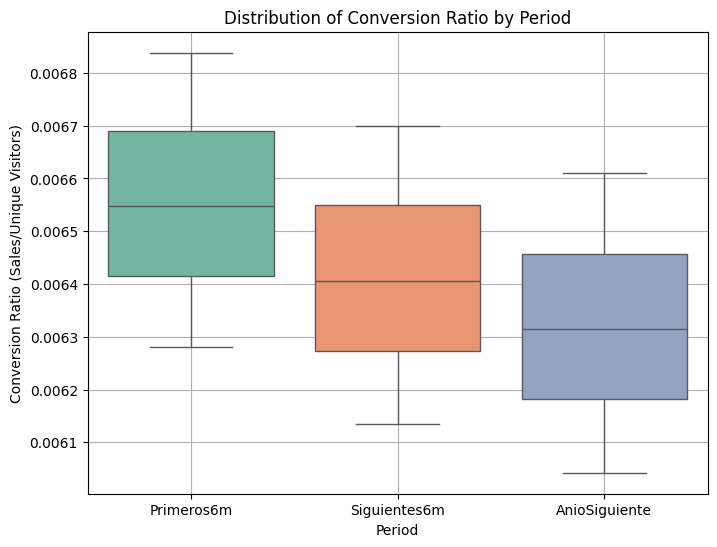

C:\Users\1cnac\AppData\Local\Temp\ipykernel_21772\869441059.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_scenarios.groupby("Period").agg({


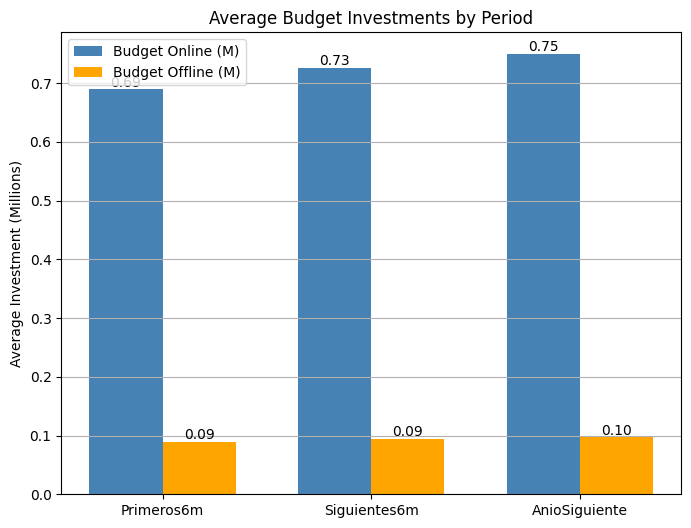

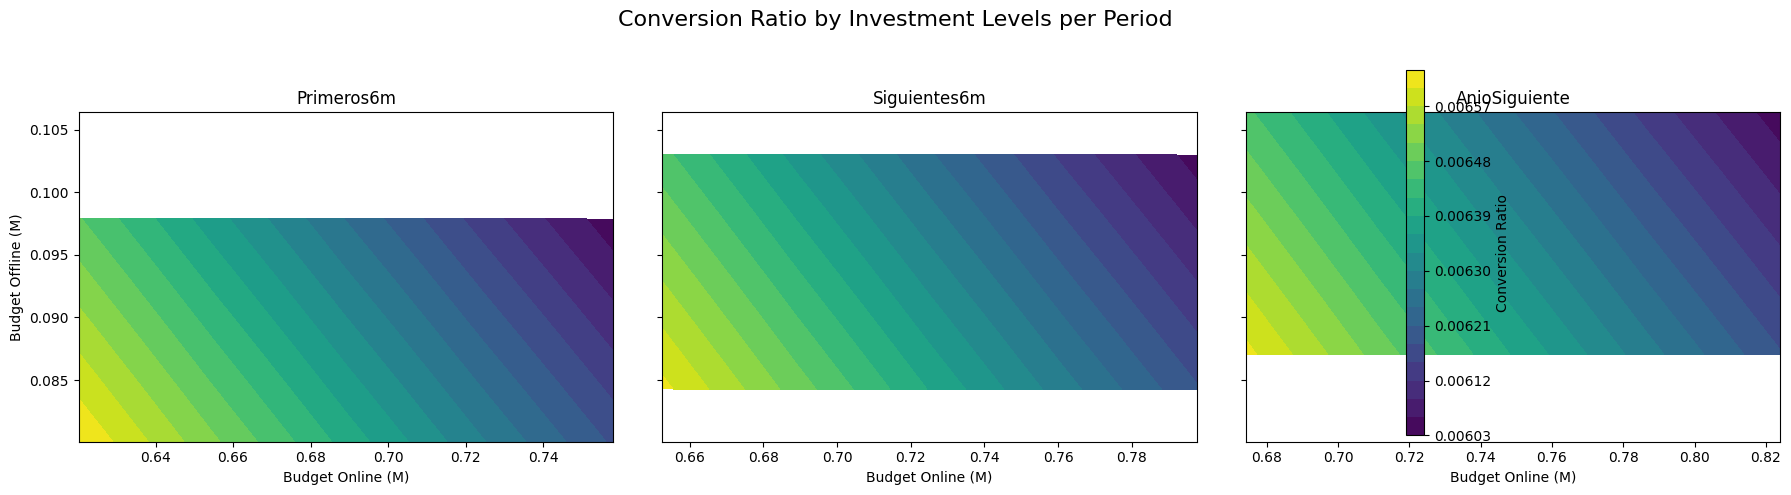

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Asegurarse de que la columna Period se trate como variable categórica ordenada:
order = ["Primeros6m", "Siguientes6m", "AnioSiguiente"]
df_scenarios["Period"] = pd.Categorical(df_scenarios["Period"], categories=order, ordered=True)
df_scenarios.sort_values("Period", inplace=True)

# =============================================================================
# Graph 2: Box Plot de la Distribución del Ratio por Period
# =============================================================================
plt.figure(figsize=(8,6))
sns.boxplot(x="Period", y="ratio", data=df_scenarios, order=order, palette="Set2")
plt.xlabel("Period")
plt.ylabel("Conversion Ratio (Sales/Unique Visitors)")
plt.title("Distribution of Conversion Ratio by Period")
plt.grid(True)
plt.show()

# =============================================================================
# Graph 3: Line Plot de Medias por Period para Predicted Sales, Predicted Unique Visitors y Ratio
# =============================================================================
grouped = df_scenarios.groupby("Period").agg({
    "pred_sales": "mean",
    "pred_unique_visitors": "mean",
    "ratio": "mean",
    "Budget_Online": "mean",
    "Budget_Offline": "mean"
}).reindex(order)


# =============================================================================
# Graph 4: Bar Plot para la Inversión Promedio (Online y Offline) por Period
# =============================================================================
avg_budget = grouped[["Budget_Online", "Budget_Offline"]] / 1e6  # Conversión a millones
x = np.arange(len(grouped))
width = 0.35
fig, ax = plt.subplots(figsize=(8,6))
bar_online = ax.bar(x - width/2, avg_budget["Budget_Online"], width, label="Budget Online (M)", color='steelblue')
bar_offline = ax.bar(x + width/2, avg_budget["Budget_Offline"], width, label="Budget Offline (M)", color='orange')
ax.set_xticks(x)
ax.set_xticklabels(grouped.index)
ax.set_ylabel("Average Investment (Millions)")
ax.set_title("Average Budget Investments by Period")
ax.legend()
ax.grid(axis='y')

# Agregar etiquetas sobre cada barra
for bar in bar_online:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f'{height:.2f}', ha='center', va='bottom')
for bar in bar_offline:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f'{height:.2f}', ha='center', va='bottom')
plt.show()

# =============================================================================
# Graph 5: Contour Plots de Conversion Ratio por Budget, separados por Periodo
# =============================================================================
# Generamos subplots para cada periodo:
fig, axes = plt.subplots(1, len(order), figsize=(18,5), sharey=True)
for i, period in enumerate(order):
    sub_df = df_scenarios[df_scenarios["Period"] == period]
    # Se crea una pivot table: filas = Budget_Offline, columnas = Budget_Online, valores = ratio
    pivot = sub_df.pivot_table(index="Budget_Offline", columns="Budget_Online", values="ratio", aggfunc="mean")
    X_vals = pivot.columns / 1e6  # en millones
    Y_vals = pivot.index / 1e6      # en millones
    Z_vals = pivot.values
    cs = axes[i].contourf(X_vals, Y_vals, Z_vals, cmap="viridis", levels=20)
    axes[i].set_title(period)
    axes[i].set_xlabel("Budget Online (M)")
    if i == 0:
        axes[i].set_ylabel("Budget Offline (M)")
fig.suptitle("Conversion Ratio by Investment Levels per Period", fontsize=16)
cbar = fig.colorbar(cs, ax=axes.ravel().tolist(), shrink=0.95)
cbar.set_label("Conversion Ratio")
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


C:\Users\1cnac\AppData\Local\Temp\ipykernel_21772\1146736967.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_scenarios.groupby("Period").agg({"ratio": "mean"}).reindex(order)


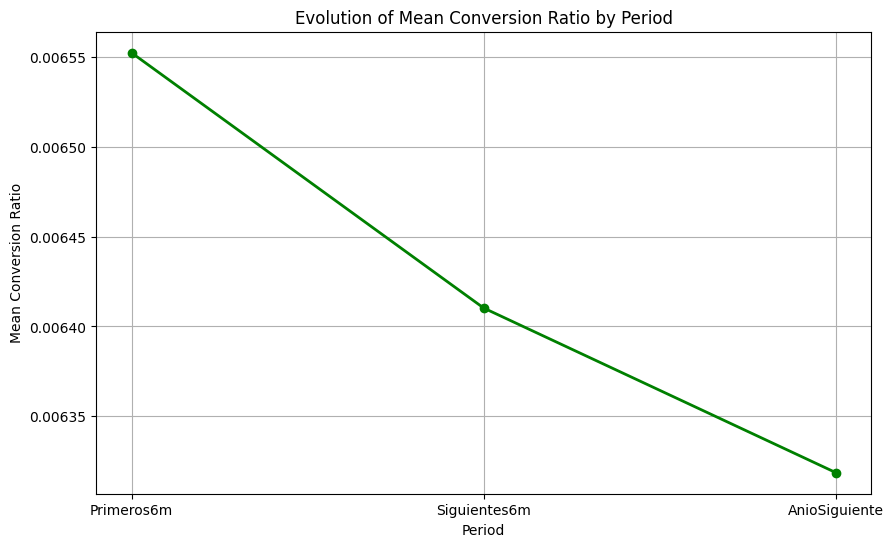

C:\Users\1cnac\AppData\Local\Temp\ipykernel_21772\1146736967.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_budget = df_scenarios.groupby("Period").agg({


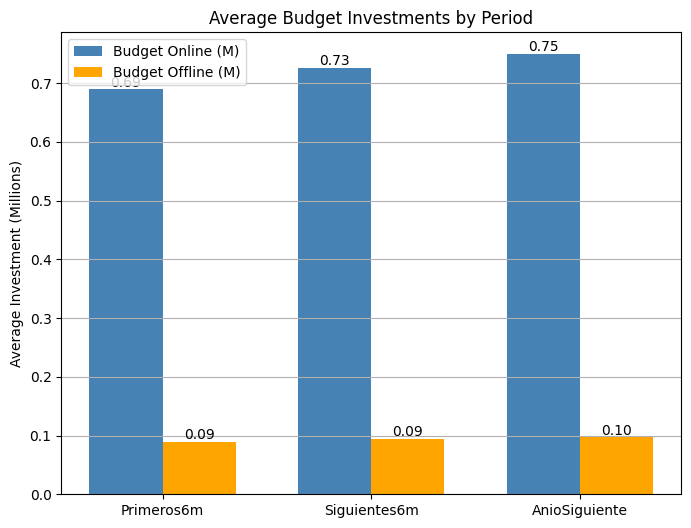

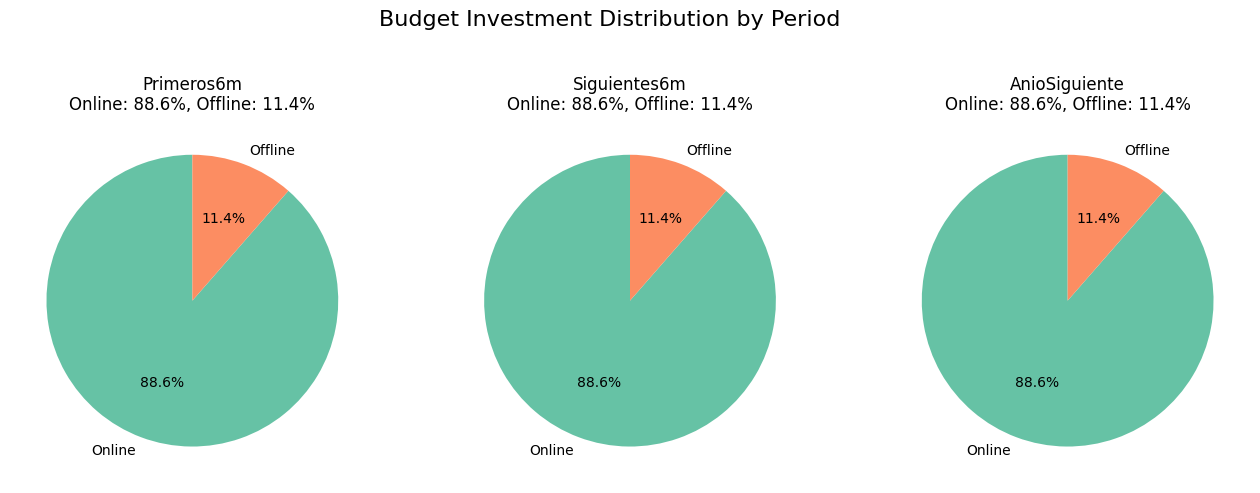

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# -------------------------
# Asegurarse de que 'Period' tenga el orden deseado
# -------------------------
order = ["Primeros6m", "Siguientes6m", "AnioSiguiente"]
df_scenarios["Period"] = pd.Categorical(df_scenarios["Period"], categories=order, ordered=True)
df_scenarios.sort_values("Period", inplace=True)

# =============================================================================
# Graph 2: Line Plot: Evolución del Ratio (Sales/Unique Visitors) por Period
# =============================================================================
# Para evitar que la gráfica esté saturada por muchos escenarios,
# se agrupa por Period (calculando la media del ratio).
grouped = df_scenarios.groupby("Period").agg({"ratio": "mean"}).reindex(order)
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped["ratio"], marker='o', linestyle='-', color='green', linewidth=2)
plt.xlabel("Period")
plt.ylabel("Mean Conversion Ratio")
plt.title("Evolution of Mean Conversion Ratio by Period")
plt.grid(True)
plt.show()

# =============================================================================
# Graph 3: Grouped Bar Plot: Inversión Promedio por Period (Budget Online & Offline)
# =============================================================================
grouped_budget = df_scenarios.groupby("Period").agg({
    "Budget_Online": "mean",
    "Budget_Offline": "mean"
}).reindex(order)

# Convertir a millones para mayor legibilidad
grouped_budget["Budget_Online"] = grouped_budget["Budget_Online"] / 1e6
grouped_budget["Budget_Offline"] = grouped_budget["Budget_Offline"] / 1e6

x = np.arange(len(grouped_budget))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(x - width/2, grouped_budget["Budget_Online"], width, label="Budget Online (M)", color='steelblue')
bar2 = ax.bar(x + width/2, grouped_budget["Budget_Offline"], width, label="Budget Offline (M)", color='orange')

ax.set_xticks(x)
ax.set_xticklabels(grouped_budget.index)
ax.set_ylabel("Average Investment (Millions)")
ax.set_title("Average Budget Investments by Period")
ax.legend()
ax.grid(axis='y')

# Añadir etiquetas de valor en cada barra
for bar in bar1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)
for bar in bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()

# =============================================================================
# Graph 4: Panel de Pie Charts: Distribución de Inversión (Budget Online vs. Offline) por Period
# =============================================================================
# Para cada period se calcula el porcentaje de inversión online y offline (sobre el total)
fig, axs = plt.subplots(1, len(order), figsize=(16,6))
colors = sns.color_palette("Set2", 2)
for i, period in enumerate(order):
    sub_df = df_scenarios[df_scenarios["Period"] == period]
    # Calcular la media de inversiones en el periodo
    mean_online  = sub_df["Budget_Online"].mean()
    mean_offline = sub_df["Budget_Offline"].mean()
    total = mean_online + mean_offline
    if total > 0:
        pct_online = 100 * mean_online / total
        pct_offline = 100 * mean_offline / total
    else:
        pct_online, pct_offline = 0, 0
    axs[i].pie([pct_online, pct_offline], labels=["Online", "Offline"], autopct="%1.1f%%", startangle=90,
               colors=colors)
    axs[i].set_title(f"{period}\nOnline: {pct_online:.1f}%, Offline: {pct_offline:.1f}%")
fig.suptitle("Budget Investment Distribution by Period", fontsize=16)
plt.show()
